<a href="https://colab.research.google.com/github/zihvvan/DataAnalysis/blob/main/zihvvan/ch06_03%2Bch07_01_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 피봇 & 그룹분석

In [1]:
import pandas as pd
import numpy as np

In [5]:
# https://www.data.go.kr/data/15049906/fileData.do
from google.colab import files

files.upload()

Saving 한국가스공사_월별 천연가스 생산량_20221031.csv to 한국가스공사_월별 천연가스 생산량_20221031.csv


{'한국가스공사_월별 천연가스 생산량_20221031.csv': b'\xbf\xac\xb5\xb5,\xbf\xf9,\xbb\xfd\xbb\xea\xb7\xae\r\n2016,01,4288593\r\n2016,02,3592400\r\n2016,03,3201669\r\n2016,04,2135286\r\n2016,05,1989360\r\n2016,06,2076852\r\n2016,07,2300665\r\n2016,08,2278564\r\n2016,09,2046908\r\n2016,10,2523673\r\n2016,11,3473228\r\n2016,12,3912322\r\n2017,01,4207223\r\n2017,02,3804316\r\n2017,03,3427452\r\n2017,04,2420775\r\n2017,05,2075409\r\n2017,06,2230415\r\n2017,07,2490762\r\n2017,08,2269045\r\n2017,09,1984946\r\n2017,10,2157623\r\n2017,11,3621631\r\n2017,12,4951454\r\n2018,01,5237703\r\n2018,02,4384777\r\n2018,03,3841499\r\n2018,04,3127678\r\n2018,05,2742394\r\n2018,06,2629796\r\n2018,07,2752572\r\n2018,08,2726077\r\n2018,09,2171415\r\n2018,10,2967234\r\n2018,11,3531774\r\n2018,12,4763917\r\n2019,01,4891471\r\n2019,02,3970829\r\n2019,03,3681343\r\n2019,04,3193679\r\n2019,05,2597643\r\n2019,06,2318995\r\n2019,07,2707143\r\n2019,08,2673247\r\n2019,09,2316792\r\n2019,10,2663634\r\n2019,11,3590748\r\n2019,12,4853647

In [6]:
# encoding='cp949'
df = pd.read_csv('한국가스공사_월별 천연가스 생산량_20221031.csv', encoding='cp949')
df.head()

,연도,월,생산량
0,2016,1,4288593.0
1,2016,2,3592400.0
2,2016,3,3201669.0
3,2016,4,2135286.0
4,2016,5,1989360.0


In [7]:
df.tail()

,연도,월,생산량
77,2022,6,2877369.949
78,2022,7,3175651.631
79,2022,8,2885559.384
80,2022,9,2575865.622
81,2022,10,2932386.685


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      82 non-null     int64  
 1   월       82 non-null     int64  
 2   생산량     82 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 2.0 KB


In [9]:
df.describe()

,연도,월,생산량
count,82.000000,82.000000,8.200000e+01
mean,2018.926829,6.378049,3.283609e+06
std,1.980027,3.423377,9.480209e+05
min,2016.000000,1.000000,1.984946e+06
25%,2017.000000,3.250000,2.581310e+06
50%,2019.000000,6.000000,2.969825e+06
75%,2021.000000,9.000000,3.839462e+06
max,2022.000000,12.000000,5.666333e+06


In [10]:
df2 = df.iloc[:12, [1, 2]].copy()
df2

,월,생산량
0,1,4288593.0
1,2,3592400.0
2,3,3201669.0
3,4,2135286.0
4,5,1989360.0
5,6,2076852.0
6,7,2300665.0
7,8,2278564.0
8,9,2046908.0
9,10,2523673.0


In [11]:
# 행 인덱스, 열 인덱스, 데이터
# df.pivot('연도', '월', '생산량')
df.pivot('월', '연도', '생산량')

연도,2016,2017,2018,2019,2020,2021,2022
월,,,,,,,
1,4288593.0,4207223.0,5237703.0,4891471.0,4782757.0,5666333.000,5337930.094
2,3592400.0,3804316.0,4384777.0,3970829.0,4245791.0,4342644.000,4727536.483
3,3201669.0,3427452.0,3841499.0,3681343.0,3833352.0,4141503.000,4510243.141
4,2135286.0,2420775.0,3127678.0,3193679.0,2833558.0,3296135.000,3280795.562
5,1989360.0,2075409.0,2742394.0,2597643.0,2165280.0,2972416.000,2918718.758
6,2076852.0,2230415.0,2629796.0,2318995.0,2291469.0,2943359.000,2877369.949
7,2300665.0,2490762.0,2752572.0,2707143.0,2468908.0,3264511.000,3175651.631
8,2278564.0,2269045.0,2726077.0,2673247.0,2812994.0,2942282.000,2885559.384
9,2046908.0,1984946.0,2171415.0,2316792.0,2666938.0,2786125.254,2575865.622


In [12]:
df

,연도,월,생산량
0,2016,1,4288593.000
1,2016,2,3592400.000
2,2016,3,3201669.000
3,2016,4,2135286.000
4,2016,5,1989360.000
...,...,...,...
77,2022,6,2877369.949
78,2022,7,3175651.631
79,2022,8,2885559.384
80,2022,9,2575865.622


In [13]:
g = df.groupby(df['연도'])
g

In [14]:
g.groups

{2016: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 2017: [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 2018: [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 2019: [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], 2020: [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], 2021: [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71], 2022: [72, 73, 74, 75, 76, 77, 78, 79, 80, 81]}

In [15]:
g.count()

,월,생산량
연도,,
2016,12,12
2017,12,12
2018,12,12
2019,12,12
2020,12,12
2021,12,12
2022,10,10


In [16]:
g.mean()

,월,생산량
연도,,
2016,6.5,2.818293e+06
2017,6.5,2.970088e+06
2018,6.5,3.406403e+06
2019,6.5,3.288264e+06
2020,6.5,3.331080e+06
2021,6.5,3.688694e+06
2022,5.5,3.522206e+06


In [17]:
pd.options.display.float_format = '{:.2f}'.format

In [18]:
g.mean()

,월,생산량
연도,,
2016,6.50,2818293.33
2017,6.50,2970087.58
2018,6.50,3406403.00
2019,6.50,3288264.25
2020,6.50,3331080.25
2021,6.50,3688693.57
2022,5.50,3522205.73


In [19]:
g.std()

,월,생산량
연도,,
2016,3.61,824526.60
2017,3.61,990274.11
2018,3.61,957689.61
2019,3.61,914919.44
2020,3.61,1011712.59
2021,3.61,910519.81
2022,3.03,962233.98


In [20]:
g2 = df.groupby([df.연도, df.월])
g2

In [21]:
g2.groups

{(2016, 1): [0], (2016, 2): [1], (2016, 3): [2], (2016, 4): [3], (2016, 5): [4], (2016, 6): [5], (2016, 7): [6], (2016, 8): [7], (2016, 9): [8], (2016, 10): [9], (2016, 11): [10], (2016, 12): [11], (2017, 1): [12], (2017, 2): [13], (2017, 3): [14], (2017, 4): [15], (2017, 5): [16], (2017, 6): [17], (2017, 7): [18], (2017, 8): [19], (2017, 9): [20], (2017, 10): [21], (2017, 11): [22], (2017, 12): [23], (2018, 1): [24], (2018, 2): [25], (2018, 3): [26], (2018, 4): [27], (2018, 5): [28], (2018, 6): [29], (2018, 7): [30], (2018, 8): [31], (2018, 9): [32], (2018, 10): [33], (2018, 11): [34], (2018, 12): [35], (2019, 1): [36], (2019, 2): [37], (2019, 3): [38], (2019, 4): [39], (2019, 5): [40], (2019, 6): [41], (2019, 7): [42], (2019, 8): [43], (2019, 9): [44], (2019, 10): [45], (2019, 11): [46], (2019, 12): [47], (2020, 1): [48], (2020, 2): [49], (2020, 3): [50], (2020, 4): [51], (2020, 5): [52], (2020, 6): [53], (2020, 7): [54], (2020, 8): [55], (2020, 9): [56], (2020, 10): [57], (2020, 11)

In [22]:
g2.sum()

생산량
연도   월            
2016 1  4288593.00
     2  3592400.00
     3  3201669.00
     4  2135286.00
     5  1989360.00
...            ...
2022 6  2877369.95
     7  3175651.63
     8  2885559.38
     9  2575865.62
     10 2932386.69

[82 rows x 1 columns]

In [23]:
# https://www.data.go.kr/data/15070282/fileData.do
from google.colab import files

fname = list(files.upload().keys())[0]
# print(fname)
df2 = pd.read_csv(fname, encoding='cp949')
df2

Saving 도로교통공단_사고유형별 교통사고 통계_20211231.csv to 도로교통공단_사고유형별 교통사고 통계_20211231.csv


,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,12767,445,5999,6664,458
1,차대사람,차도통행중,차도통행중,3628,146,1438,2007,183
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,1973,33,563,1330,121
3,차대사람,보도통행중,보도통행중,2226,21,745,1455,131
4,차대사람,기타,기타,14675,333,4887,9139,1062
5,차대차,정면충돌,정면충돌,7892,205,3539,8837,588
6,차대차,측면충돌,측면충돌,71687,404,17756,84667,5781
7,차대차,후진중충돌,후진중충돌,3514,2,304,4172,162
8,차대차,추돌,추돌,32717,379,7564,47111,2748
9,차대차,기타,기타,44222,248,9990,49616,3839


In [24]:
df2_g = df2.groupby([df2['사고유형대분류'], df2['사고유형중분류']])
df2_g

In [25]:
df2_g.mean()

사고건수   사망자수     중상자수     경상자수  부상신고자수
사고유형대분류 사고유형중분류                                             
차대사람    기타         14675.00 333.00  4887.00  9139.00 1062.00
        길가장자리구역통행중  1973.00  33.00   563.00  1330.00  121.00
        보도통행중       2226.00  21.00   745.00  1455.00  131.00
        차도통행중       3628.00 146.00  1438.00  2007.00  183.00
        횡단중        12767.00 445.00  5999.00  6664.00  458.00
차대차     기타         44222.00 248.00  9990.00 49616.00 3839.00
        정면충돌        7892.00 205.00  3539.00  8837.00  588.00
        추돌         32717.00 379.00  7564.00 47111.00 2748.00
        측면충돌       71687.00 404.00 17756.00 84667.00 5781.00
        후진중충돌       3514.00   2.00   304.00  4172.00  162.00
차량단독    공작물충돌       2742.00 340.00  1256.00  1504.00  532.00
        기타          3401.00 148.00  1114.00  2030.00  495.00
        도로이탈         270.50  45.50   136.00   129.00   39.00
        전도           956.00  82.00   384.00   403.00  209.00
        전복           165.00  36.00    87.00    81.00   27.00
        주/정차차량 충돌     23.00   3.00     7.00     8.00    6.00
철길건널목   철길건널목          1.00   0.00     0.00     1.00    0.00

In [26]:
df2_g.max()

사고유형   사고건수  사망자수   중상자수   경상자수  부상신고자수
사고유형대분류 사고유형중분류                                                  
차대사람    기타                  기타  14675   333   4887   9139    1062
        길가장자리구역통행중  길가장자리구역통행중   1973    33    563   1330     121
        보도통행중            보도통행중   2226    21    745   1455     131
        차도통행중            차도통행중   3628   146   1438   2007     183
        횡단중                횡단중  12767   445   5999   6664     458
차대차     기타                  기타  44222   248   9990  49616    3839
        정면충돌              정면충돌   7892   205   3539   8837     588
        추돌                  추돌  32717   379   7564  47111    2748
        측면충돌              측면충돌  71687   404  17756  84667    5781
        후진중충돌            후진중충돌   3514     2    304   4172     162
차량단독    공작물충돌            공작물충돌   2742   340   1256   1504     532
        기타                  기타   3401   148   1114   2030     495
        도로이탈           도로이탈 추락    385    73    199    179      44
        전도                  전도    956    82    384    403     209
        전복                  전복    165    36     87     81      27
        주/정차차량 충돌    주/정차차량 충돌     23     3      7      8       6
철길건널목   철길건널목            철길건널목      1     0      0      1       0

In [27]:
f1 = files.upload()
# print(f1, type(f1))
f2 = f1.keys()
print(f2, type(f2))
f3 = list(f2)[0]
print(f3, type(f3))
# => list(files.upload().keys())[0]

Saving 도로교통공단_사고유형별 교통사고 통계_20211231.csv to 도로교통공단_사고유형별 교통사고 통계_20211231 (1).csv
dict_keys(['도로교통공단_사고유형별 교통사고 통계_20211231.csv']) <class 'dict_keys'>
도로교통공단_사고유형별 교통사고 통계_20211231.csv <class 'str'>


In [28]:
# https://www.kaggle.com/datasets/bluemumin/kbo-baseball-for-kaggle
from google.colab import files

fname = list(files.upload().keys())[0]
# print(fname)
# encoding = 'utf8' #@param["utf8", "cp949"]
# df = pd.read_csv(fname, encoding=encoding)
df = None
try:
    df = pd.read_csv(fname, encoding='utf8')
    print("UTF-8")
except:
    df = pd.read_csv(fname, encoding='cp949')
    print("CP949")
df

Saving archive.zip to archive.zip
UTF-8


,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,tp,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,백용환,24.00,26.00,58.00,52.00,4.00,9.00,4.00,0.00,0.00,...,포수,5.00,6.00,0.17,0.26,0.25,0.51,2014,79.00,0.58
1,백용환,25.00,47.00,86.00,79.00,8.00,14.00,2.00,0.00,4.00,...,포수,8.00,5.00,0.18,0.23,0.35,0.58,2015,154.00,0.78
2,백용환,26.00,65.00,177.00,154.00,22.00,36.00,6.00,0.00,10.00,...,포수,20.00,20.00,0.23,0.32,0.47,0.78,2016,174.00,0.58
3,백용환,27.00,80.00,199.00,174.00,12.00,34.00,7.00,0.00,4.00,...,포수,23.00,20.00,0.20,0.28,0.30,0.58,2017,17.00,0.48
4,백용환,28.00,15.00,20.00,17.00,2.00,3.00,0.00,0.00,0.00,...,포수,3.00,3.00,0.18,0.30,0.18,0.48,2018,47.00,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,이원석,32.00,128.00,543.00,479.00,74.00,144.00,30.00,1.00,20.00,...,3루수,93.00,59.00,0.30,0.37,0.49,0.87,2019,395.00,0.77
1909,조용호,28.00,68.00,225.00,191.00,34.00,52.00,7.00,1.00,0.00,...,우익수,44.00,28.00,0.27,0.36,0.32,0.68,2018,13.00,0.15
1910,조용호,29.00,16.00,14.00,13.00,4.00,1.00,0.00,0.00,0.00,...,우익수,1.00,0.00,0.08,0.08,0.08,0.15,2019,188.00,0.72
1911,히메네스,27.00,70.00,299.00,279.00,37.00,87.00,17.00,2.00,11.00,...,3루수,57.00,16.00,0.31,0.34,0.51,0.85,2016,523.00,0.89


# 시각화 기초

In [29]:
# 천연가스
from google.colab import files

fname = list(files.upload().keys())[0]
# print(fname)
# encoding = 'utf8' #@param["utf8", "cp949"]
# df = pd.read_csv(fname, encoding=encoding)
df = None
try:
    df = pd.read_csv(fname, encoding='utf8')
    print("UTF-8")
except:
    df = pd.read_csv(fname, encoding='cp949')
    print("CP949")
df

Saving 한국가스공사_월별 천연가스 생산량_20221031.csv to 한국가스공사_월별 천연가스 생산량_20221031 (1).csv
CP949


,연도,월,생산량
0,2016,1,4288593.00
1,2016,2,3592400.00
2,2016,3,3201669.00
3,2016,4,2135286.00
4,2016,5,1989360.00
...,...,...,...
77,2022,6,2877369.95
78,2022,7,3175651.63
79,2022,8,2885559.38
80,2022,9,2575865.62


In [31]:
#1 : 인덱스로 직접 슬라이싱 뽑기
df.iloc[:12], df.loc[:11]

(      연도   월        생산량
 0   2016   1 4288593.00
 1   2016   2 3592400.00
 2   2016   3 3201669.00
 3   2016   4 2135286.00
 4   2016   5 1989360.00
 5   2016   6 2076852.00
 6   2016   7 2300665.00
 7   2016   8 2278564.00
 8   2016   9 2046908.00
 9   2016  10 2523673.00
 10  2016  11 3473228.00
 11  2016  12 3912322.00,       연도   월        생산량
 0   2016   1 4288593.00
 1   2016   2 3592400.00
 2   2016   3 3201669.00
 3   2016   4 2135286.00
 4   2016   5 1989360.00
 5   2016   6 2076852.00
 6   2016   7 2300665.00
 7   2016   8 2278564.00
 8   2016   9 2046908.00
 9   2016  10 2523673.00
 10  2016  11 3473228.00
 11  2016  12 3912322.00)

In [32]:
#2 : 불리언 배열 인덱싱
# df[df['연도'] == 2016]
df.loc[df['연도'] == 2016]

,연도,월,생산량
0,2016,1,4288593.00
1,2016,2,3592400.00
2,2016,3,3201669.00
3,2016,4,2135286.00
4,2016,5,1989360.00
5,2016,6,2076852.00
6,2016,7,2300665.00
7,2016,8,2278564.00
8,2016,9,2046908.00
9,2016,10,2523673.00


In [33]:
#3 : query
df.query('연도 == 2016')

,연도,월,생산량
0,2016,1,4288593.00
1,2016,2,3592400.00
2,2016,3,3201669.00
3,2016,4,2135286.00
4,2016,5,1989360.00
5,2016,6,2076852.00
6,2016,7,2300665.00
7,2016,8,2278564.00
8,2016,9,2046908.00
9,2016,10,2523673.00


In [34]:
df_2016 = df.loc[df['연도'] == 2016].copy()
df_2016

,연도,월,생산량
0,2016,1,4288593.00
1,2016,2,3592400.00
2,2016,3,3201669.00
3,2016,4,2135286.00
4,2016,5,1989360.00
5,2016,6,2076852.00
6,2016,7,2300665.00
7,2016,8,2278564.00
8,2016,9,2046908.00
9,2016,10,2523673.00


In [35]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPy

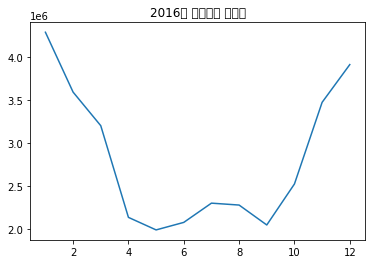

In [36]:
plt.title('2016년 천연가스 생산량')
plt.plot(df_2016['월'], df_2016['생산량'])
plt.show()

In [37]:
# 한글 폰트를 다운로드 받는 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (10.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128275 files and dir

In [1]:
# 천연가스
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트를 나눔폰트로 설정
plt.rc('font', family='NanumBarunGothic')

fname = list(files.upload().keys())[0]
# print(fname)
# encoding = 'utf8' #@param["utf8", "cp949"]
# df = pd.read_csv(fname, encoding=encoding)
df = None
try:
    df = pd.read_csv(fname, encoding='utf8')
    print("UTF-8")
except:
    df = pd.read_csv(fname, encoding='cp949')
    print("CP949")
df_2016 = df.loc[df['연도'] == 2016].copy()
df_2016

Saving 한국가스공사_월별 천연가스 생산량_20221031.csv to 한국가스공사_월별 천연가스 생산량_20221031 (2).csv
CP949


,연도,월,생산량
0,2016,1,4288593.0
1,2016,2,3592400.0
2,2016,3,3201669.0
3,2016,4,2135286.0
4,2016,5,1989360.0
5,2016,6,2076852.0
6,2016,7,2300665.0
7,2016,8,2278564.0
8,2016,9,2046908.0
9,2016,10,2523673.0


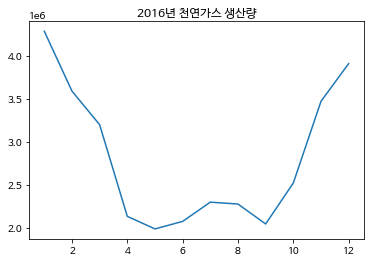

In [2]:
plt.title('2016년 천연가스 생산량')
plt.plot(df_2016['월'], df_2016['생산량'])
plt.show()

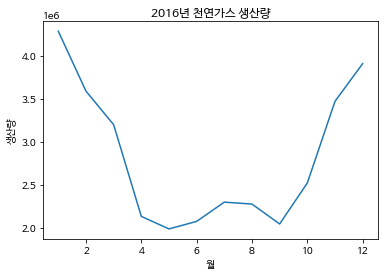

In [3]:
plt.title('2016년 천연가스 생산량')
plt.plot(df_2016['월'], df_2016['생산량'])
plt.xlabel('월')
plt.ylabel('생산량')
plt.show()

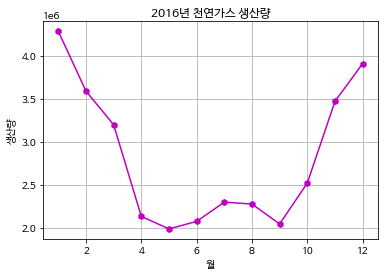

In [6]:
#@markdown ![style](https://wikidocs.net/images/page/92083/set_marker_05.png)
plt.title('2016년 천연가스 생산량')
plt.plot(
    df_2016['월'], df_2016['생산량'],
    # 'g^:'
    'mh-'
)
plt.grid(True)
plt.xlabel('월')
plt.ylabel('생산량')
plt.show()

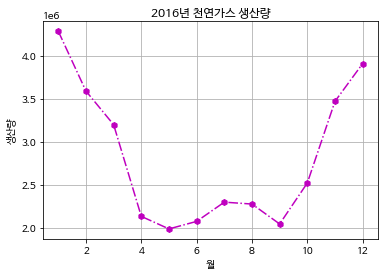

In [7]:
plt.title('2016년 천연가스 생산량')
plt.plot(
    df_2016['월'], df_2016['생산량'],
    # 'g^:'
    'mh-.'
)
plt.grid(True)
plt.xlabel('월')
plt.ylabel('생산량')
plt.show()

In [8]:
# df_2016 = df.loc[df['연도'] == 2016].copy()
df_by_year = lambda year: df.loc[df['연도'] == year].copy()
df_by_year(2017)

,연도,월,생산량
12,2017,1,4207223.0
13,2017,2,3804316.0
14,2017,3,3427452.0
15,2017,4,2420775.0
16,2017,5,2075409.0
17,2017,6,2230415.0
18,2017,7,2490762.0
19,2017,8,2269045.0
20,2017,9,1984946.0
21,2017,10,2157623.0


In [9]:
month_and_yield = lambda year: (df_by_year(year)['월'], df_by_year(year)['생산량'])
month_and_yield(2016)

(0      1
 1      2
 2      3
 3      4
 4      5
 5      6
 6      7
 7      8
 8      9
 9     10
 10    11
 11    12
 Name: 월, dtype: int64, 0     4288593.0
 1     3592400.0
 2     3201669.0
 3     2135286.0
 4     1989360.0
 5     2076852.0
 6     2300665.0
 7     2278564.0
 8     2046908.0
 9     2523673.0
 10    3473228.0
 11    3912322.0
 Name: 생산량, dtype: float64)

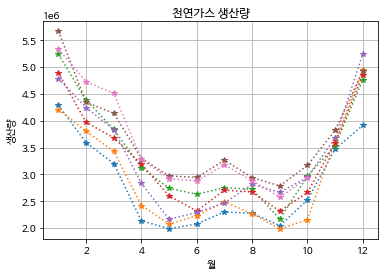

In [11]:
plt.title('천연가스 생산량')
plt.plot(
    *month_and_yield(2016), '*:',
    *month_and_yield(2017), '*:',
    *month_and_yield(2018), '*:',
    *month_and_yield(2019), '*:',
    *month_and_yield(2020), '*:',
    *month_and_yield(2021), '*:',
    *month_and_yield(2022), '*:',
)
plt.grid(True)
plt.xlabel('월')
plt.ylabel('생산량')
plt.show()

In [12]:
draw_plot = lambda year: plt.plot(*month_and_yield(year), '*:', label=f'{year}')

In [13]:
# [v for v in df['연도']]
[v for v in df['연도'].unique()]
[v for v in set(df['연도'])]

[2016, 2017, 2018, 2019, 2020, 2021, 2022]

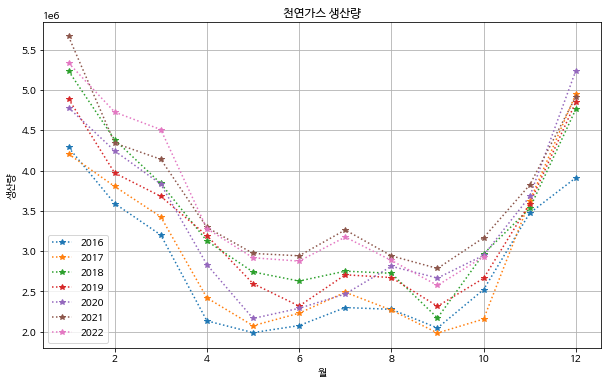

In [14]:
df_by_year = lambda year: df.loc[df['연도'] == year].copy()
month_and_yield = lambda year: (df_by_year(year)['월'], df_by_year(year)['생산량'])
draw_plot = lambda year: plt.plot(*month_and_yield(year), '*:', label=f'{year}')

plt.figure(figsize=(10, 6))
plt.title('천연가스 생산량')
for v in df['연도'].unique():
    draw_plot(v)
plt.grid(True)
plt.xlabel('월')
plt.ylabel('생산량')
plt.legend(loc=0)
plt.show()

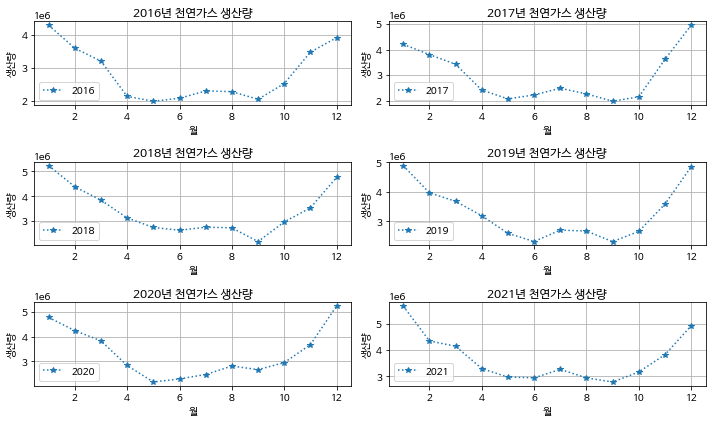

In [16]:
df_by_year = lambda year: df.loc[df['연도'] == year].copy()
month_and_yield = lambda year: (df_by_year(year)['월'], df_by_year(year)['생산량'])
# draw_plot = lambda year: plt.plot(*month_and_yield(year), '*:', label=f'{year}')
def draw_plot(i, year):
    plt.subplot(3, 2, i+1)
    plt.title(f'{year}년 천연가스 생산량')
    plt.plot(*month_and_yield(year), '*:', label=f'{year}')
    plt.grid(True)
    plt.xlabel('월')
    plt.ylabel('생산량')
    plt.legend(loc=3)
plt.figure(figsize=(10, 6))
# for i, year in enumerate(df['연도'].unique()[:-1]): # 맨 뒤에 1개를 빼는 코드
for i in enumerate(df['연도'].unique()[:-1]): # 맨 뒤에 1개를 빼는 코드
    draw_plot(*i)
plt.tight_layout()
plt.show()

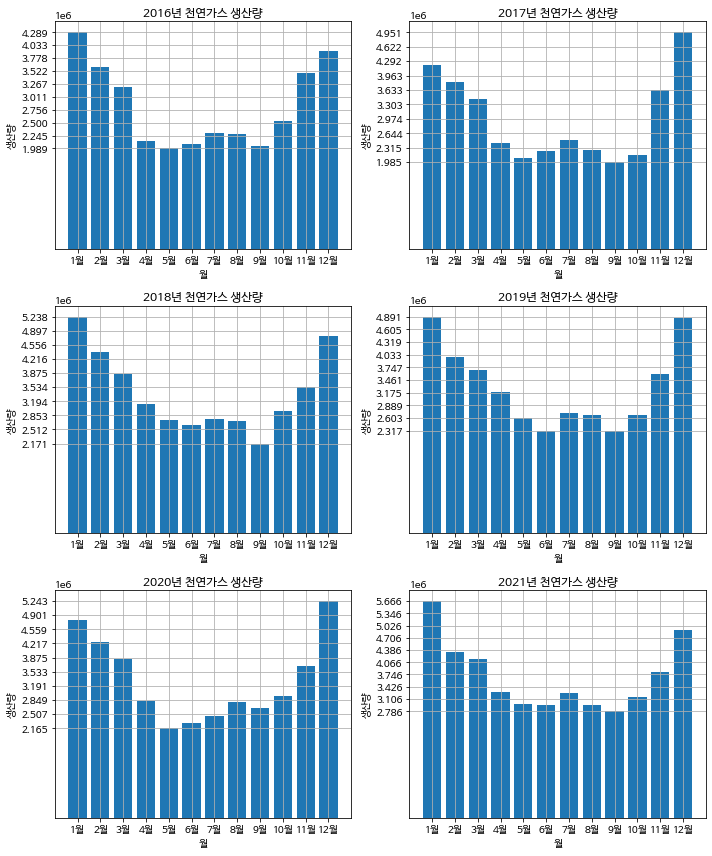

In [18]:
import numpy as np

df_by_year = lambda year: df.loc[df['연도'] == year].copy()
month_and_yield = lambda year: (df_by_year(year)['월'], df_by_year(year)['생산량'])
# draw_plot = lambda year: plt.plot(*month_and_yield(year), '*:', label=f'{year}')
def draw_plot(i, year):
    plt.subplot(3, 2, i+1)
    plt.title(f'{year}년 천연가스 생산량')
    # plt.plot(*month_and_yield(year), '*:', label=f'{year}')
    my = month_and_yield(year)
    plt.bar(*my)
    plt.grid(True)
    plt.xlabel('월')
    plt.ylabel('생산량')
    plt.xticks(my[0], [f"{v}월" for v in my[0]])
    plt.yticks(np.linspace(my[1].min(), my[1].max(), 10))
    # plt.legend(loc=3)
plt.figure(figsize=(10, 12))
# for i, year in enumerate(df['연도'].unique()[:-1]): # 맨 뒤에 1개를 빼는 코드
for i in enumerate(df['연도'].unique()[:-1]): # 맨 뒤에 1개를 빼는 코드
    draw_plot(*i)
plt.tight_layout()
plt.show()

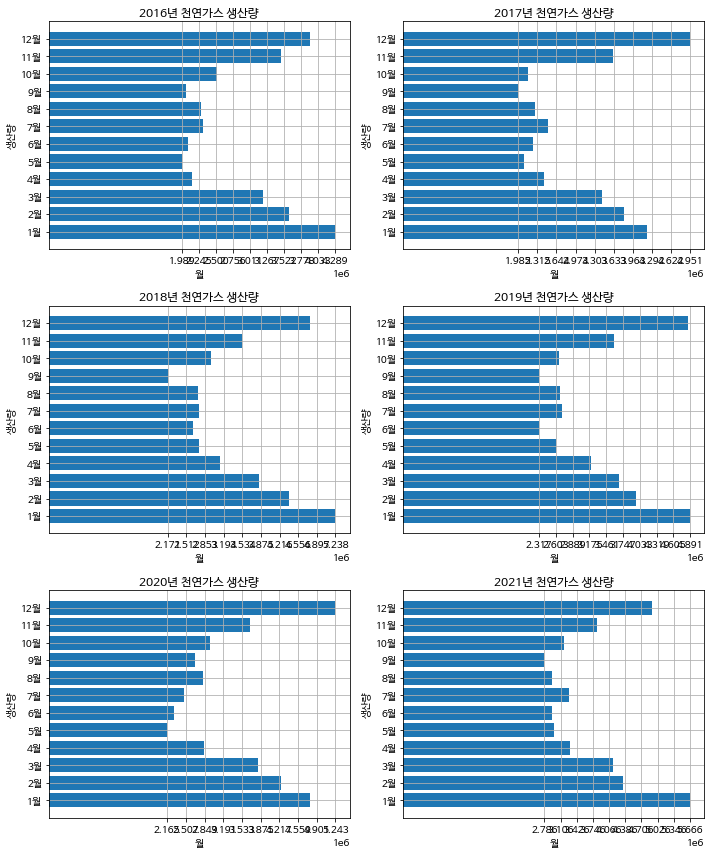

In [20]:
import numpy as np

df_by_year = lambda year: df.loc[df['연도'] == year].copy()
month_and_yield = lambda year: (df_by_year(year)['월'], df_by_year(year)['생산량'])
# draw_plot = lambda year: plt.plot(*month_and_yield(year), '*:', label=f'{year}')
def draw_plot(i, year):
    plt.subplot(3, 2, i+1)
    plt.title(f'{year}년 천연가스 생산량')
    # plt.plot(*month_and_yield(year), '*:', label=f'{year}')
    my = month_and_yield(year)
    plt.barh(*my)
    plt.grid(True)
    plt.xlabel('월')
    plt.ylabel('생산량')
    plt.yticks(my[0], [f"{v}월" for v in my[0]])
    plt.xticks(np.linspace(my[1].min(), my[1].max(), 10))
    # plt.legend(loc=3)
plt.figure(figsize=(10, 12))
# for i, year in enumerate(df['연도'].unique()[:-1]): # 맨 뒤에 1개를 빼는 코드
for i in enumerate(df['연도'].unique()[:-1]): # 맨 뒤에 1개를 빼는 코드
    draw_plot(*i)
plt.tight_layout()
plt.show()

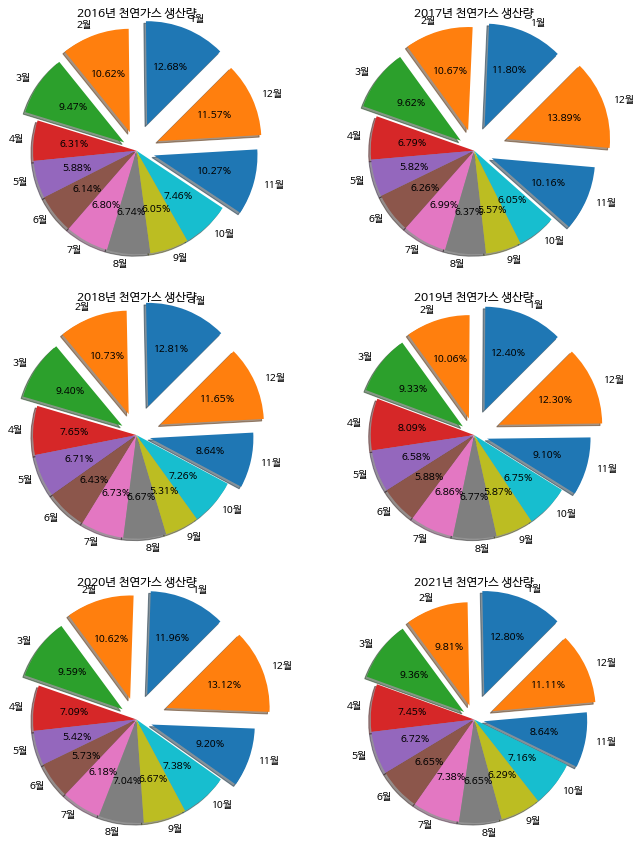

In [21]:
import numpy as np

df_by_year = lambda year: df.loc[df['연도'] == year].copy()
month_and_yield = lambda year: (df_by_year(year)['월'], df_by_year(year)['생산량'])
# draw_plot = lambda year: plt.plot(*month_and_yield(year), '*:', label=f'{year}')
def draw_plot(i, year):
    plt.subplot(3, 2, i+1)
    plt.title(f'{year}년 천연가스 생산량')
    # plt.plot(*month_and_yield(year), '*:', label=f'{year}')
    my = month_and_yield(year)
    # plt.axis('equal')
    m = my[1] / my[1].mean()
    m2 = (m - m.min()) / 3
    # m2 = ((m - m.min()) / 3).apply(lambda x: x if x > m2.mean() else 0)
    m2 = ((m - m.min()) / 3).apply(lambda x: x if x > m2.quantile(0.60) else 0)
    # print(m2)
    plt.pie(my[1],
            labels= [f"{v}월" for v in my[0]], explode=m2,
            autopct='%1.2f%%', shadow=True, startangle=45)
    # plt.legend(loc=0)
plt.figure(figsize=(10, 12))
# for i, year in enumerate(df['연도'].unique()[:-1]): # 맨 뒤에 1개를 빼는 코드
for i in enumerate(df['연도'].unique()[:-1]): # 맨 뒤에 1개를 빼는 코드
    draw_plot(*i)
plt.tight_layout()
plt.show()